# Importing Basic Libraries

In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Reading data from file and Data Analysis

In [3]:
df = pd.read_excel("Core Test Data.xlsx")

In [4]:
df.head(2)

,DocumentId,EventInstanceId,#,News Date,Source,Country,Location (LatLng),Locations,Headline,Abstract,First Part,Body,URL,Event Category,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category,Start Date,End Date,Actor List,Location Info,Level of Event,Type,Topic,Aim,Unnamed: 25,Unnamed: 26
0,AgreementsDocId1,AgreementsEventInstanceId1,1.000,2020-11-30 00:00:00,The Libya Observer,libya,NaN,"['Italy', 'Libya', 'Tripoli']",Al-Sarraj reviews with Eni officials support f...,The Head of the Libyan Presidential Council Fa...,The meeting was held in the presence of Eni CE...,NaN,https://www.libyaobserver.ly/inbrief/al-sarraj...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-30 00:00:00,NaN,"Al-Sarraj, Eni officials","Tripoli, Libya",Inter Governmental,Meeting,possible investments of the Italian company in...,NaN,NaN,NaN
1,AgreementsDocId2,AgreementsEventInstanceId2,2.000,2020-12-01 00:00:00,The Libya Observer,libya,"(32.806069013310236, 13.201975860087888)","['Italy', 'Libya']","NOC, Eni review resuming stalled projects",Chairman of the National Oil Corporation (NOC)...,The two parties also discussed the progress ma...,NaN,https://www.libyaobserver.ly/economy/noc-eni-r...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-12-01 00:00:00,NaN,"National Oil Corporation (NOC), Eni company","Tripoli, Libya",Inter Governmental,Meeting,the resumption of some significant projects th...,NaN,NaN,NaN


In [5]:
df.shape

(489, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DocumentId              463 non-null    object 
 1   EventInstanceId         463 non-null    object 
 2   #                       463 non-null    float64
 3   News Date               461 non-null    object 
 4   Source                  461 non-null    object 
 5   Country                 462 non-null    object 
 6   Location (LatLng)       70 non-null     object 
 7   Locations               436 non-null    object 
 8   Headline                462 non-null    object 
 9   Abstract                458 non-null    object 
 10  First Part              449 non-null    object 
 11  Body                    268 non-null    object 
 12  URL                     440 non-null    object 
 13  Event Category          462 non-null    object 
 14  1st Level Sub Category  462 non-null    ob

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df["DocumentId"].value_counts()

AgreementsDocId1    1
EconomicDocId31     1
EconomicDocId29     1
EconomicDocId28     1
EconomicDocId27     1
                   ..
ConflictDocId126    1
ConflictDocId125    1
ConflictDocId124    1
ConflictDocId123    1
UprisingDocId10     1
Name: DocumentId, Length: 463, dtype: int64

In [9]:
df["EventInstanceId"].value_counts()

AgreementsEventInstanceId1    1
EconomicEventInstanceId31     1
EconomicEventInstanceId29     1
EconomicEventInstanceId28     1
EconomicEventInstanceId27     1
                             ..
ConflictEventInstanceId126    1
ConflictEventInstanceId125    1
ConflictEventInstanceId124    1
ConflictEventInstanceId123    1
UprisingEventInstanceId10     1
Name: EventInstanceId, Length: 463, dtype: int64

In [10]:
df["#"].value_counts()

1.000      9
4.000      9
5.000      9
6.000      9
7.000      9
8.000      9
9.000      9
10.000     9
2.000      9
19.000     8
25.000     8
20.000     8
22.000     8
24.000     8
3.000      8
34.000     7
32.000     7
31.000     7
30.000     7
28.000     7
35.000     7
38.000     7
37.000     7
23.000     7
16.000     7
12.000     7
14.000     7
15.000     7
21.000     7
18.000     7
17.000     6
11.000     6
29.000     6
26.000     6
39.000     6
13.000     6
27.000     6
33.000     6
36.000     6
40.000     5
41.000     5
48.000     4
55.000     4
54.000     4
53.000     4
52.000     4
50.000     4
49.000     4
42.000     4
47.000     3
57.000     3
62.000     3
46.000     3
60.000     3
59.000     3
58.000     3
61.000     3
56.000     3
43.000     3
44.000     3
45.000     3
51.000     3
84.000     2
83.000     2
82.000     2
81.000     2
80.000     2
74.000     2
79.000     2
78.000     2
77.000     2
76.000     2
75.000     2
68.000     2
73.000     2
71.000     2
70.000     2

In [11]:
df["News Date"].value_counts()

2020-05-19    11
2020-05-18    10
2020-05-21     8
2020-05-26     7
2020-05-06     7
              ..
2019-11-27     1
2020-06-01     1
2020-05-16     1
2020-04-20     1
2020-01-15     1
Name: News Date, Length: 224, dtype: int64

In [12]:
df["Source"].value_counts()

The Libya Observer           115
Reuters                       88
Libya Herald                  88
ANADOLU AJANSI                52
France 24                      8
???                            8
Al-Monitor                     7
Bloomberg Business             7
Libya Business Review          7
Sputnik                        7
The Guardian                   7
Ahram Online                   6
Xinhua                         5
Al Jazeera                     4
Ahval                          3
DW                             3
Arab News                      3
BBC                            2
Ansamed                        2
???? ???????                   2
S&P Global                     2
AA                             2
The Arab Weekly                2
The Wall Street Journal        2
Deutsche Welle                 2
RTT News                       1
France24                       1
Libya Observer                 1
Africa News                    1
Middle East Eye                1
Financial 

In [13]:
df["Country"].value_counts()

libya    423
Libya     39
Name: Country, dtype: int64

In [14]:
df["Location (LatLng)"].value_counts()

(32.0668698032027, 20.327573584277467)      2
(32.46243057481838, 11.768126121704116)     2
(32.75271750246225, 13.241055017996132)     2
(27.04625257472525, 16.87964281237999)      1
(27.375178543039784, 17.567448250000016)    1
(27.4629478655878, 17.567448250000016)      1
(26.621078592185757, 17.058177031962888)    1
(27.251409595340636, 17.17081640494446)     1
(32.95192702895879, 14.404521002091828)     1
(33.60554723864274, 12.292781442061012)     1
(32.806069013310236, 13.201975860087888)    1
(26.9153477229609, 18.574290313212888)      1
(27.993360169766504, 17.38592297704074)     1
(27.40952426329324, 17.45133367270836)      1
(26.413400471702843, 17.657895849902467)    1
(32.08982535338826, 23.941114467089854)     1
(27.167793366754637, 17.110306437499997)    1
(26.844778705418225, 17.176224406249997)    1
(27.443099858095653, 17.475657500712888)    1
(28.029438602741376, 16.802689249999997)    1
(28.70324840766873, 17.387766875712888)     1
(27.045306921679085, 14.4135634263

In [15]:
df["Locations"].value_counts()

['Libya']                                                                               43
['Tripoli', 'Libya']                                                                    24
['Libya', 'Tripoli']                                                                    15
Tripoli                                                                                  9
[]                                                                                       5
                                                                                        ..
['Tarhuna', 'Tripoli', 'Libya', 'Russia', 'France', 'Egypt', 'United Arab Emirates']     1
['Sudan', 'Tripoli', 'Libya']                                                            1
['United Arab Emirates', 'Tripoli', 'Libya', 'Tarhuna']                                  1
['Sirte', 'Tarhuna', 'United Arab Emirates', 'Tripoli', 'Libya']                         1
['Marj', 'Benghazi']                                                                     1

In [16]:
df["Start Date"].value_counts()

Start Date             25
2020-01-01 00:00:00     6
2020-12-16 00:00:00     6
2020-11-19 00:00:00     5
2020-11-16 00:00:00     5
                       ..
2020-04-25 00:00:00     1
2020-02-03 00:00:00     1
2020-01-13 00:00:00     1
2020-06-04 00:00:00     1
2020-09-14 00:00:00     1
Name: Start Date, Length: 173, dtype: int64

In [17]:
df.columns

Index(['DocumentId', 'EventInstanceId', '#', 'News Date', 'Source', 'Country',
       'Location (LatLng)', 'Locations', 'Headline', 'Abstract', 'First Part',
       'Body', 'URL', 'Event Category', '1st Level Sub Category',
       '2nd Level Sub Category', '3rd Level Sub Category', 'Start Date',
       'End Date', 'Actor List', 'Location Info', 'Level of Event', 'Type',
       'Topic', 'Aim', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [18]:
df["Actor List"].value_counts()

ISIS                                                                                 17
Actor List                                                                            9
Perpetrator                                                                           8
GNA                                                                                   6
Libya                                                                                 6
                                                                                     ..
GNA, Main economic stakeholders in Libya                                              1
UN, Libya Rivals                                                                      1
UNSMIL, USA, EU, Egypt, GNA                                                           1
The Deputy Chairman of the Presidential Council (PC), Spanish Ambassador to Libya     1
Eastern Libya demonstrators                                                           1
Name: Actor List, Length: 242, d

In [19]:
df["Type"].value_counts()

Energy                                                                                                                                                                                                                                                                                                                                                        30
Meeting                                                                                                                                                                                                                                                                                                                                                       21
Economy                                                                                                                                                                                                                                                                                               

In [20]:
df["Aim"].value_counts()

bomb                                                                                                                                                                                                                                                                                                                                                                                                                                                                            8
car bomb                                                                                                                                                                                                                                                                                                                                                                                                                                                                        6
Weapon Type                                                         

In [21]:
df["Unnamed: 26"].value_counts()

Location Info                                4
Tripoli                                      3
Tripoli                                      2
Malta International Airport                  2
Sirte                                        1
Sabha - Tindi Camp                           1
Southern part of Tripoli                     1
El Feel                                      1
Tripoli, Al-Hadhba                           1
Tarhuna                                      1
Al-Watyah, Al Watiya Airbase                 1
east of Misrata                              1
Tarhuna, about 65km southeast of Tripoli     1
southern Tripoli                             1
Diverted Destination                         1
Benghazi                                     1
Name: Unnamed: 26, dtype: int64

In [22]:
df["Event Category"].value_counts()

conflicts                 133
diplomatic                 77
economicEvents             54
naturalDisasters           49
terror                     39
societalChallenges         36
politicalEvents            33
agreements                 25
uprising                   10
technologicalDisasters      6
Name: Event Category, dtype: int64

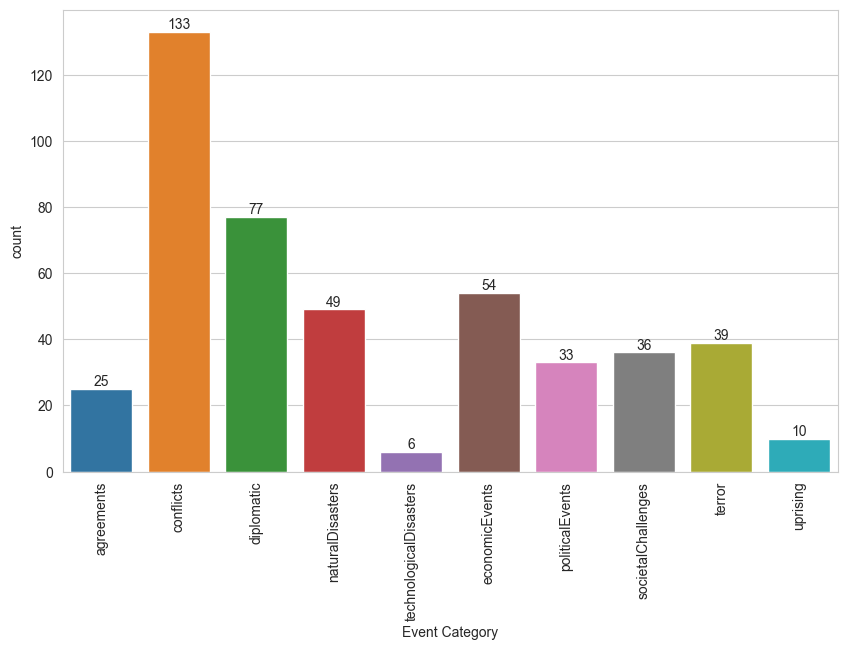

In [23]:
ax = sns.countplot(data = df, x ="Event Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [24]:
df.groupby("Event Category")[["1st Level Sub Category","2nd Level Sub Category","3rd Level Sub Category"]].value_counts()

Event Category          1st Level Sub Category  2nd Level Sub Category    3rd Level Sub Category            
conflicts               nonViolentConflicts     economicConflict          Sanctions / Sanction Threats           7
                                                militaryPreparations      Force deployment and redisposition     5
                                                economicConflict          Economic governance conflict           3
                                                retention                 Release                                3
                        armedConflicts          battles                   armed clash                            3
                                                                          Territory overtake/regain              3
                                                violenceAgainstCivilians  Attack to Civilians                    3
                                                explosionsRemoteViolence  Missile/Rock

In [25]:
df.isnull().sum()

DocumentId                 24
EventInstanceId            24
#                          24
News Date                  26
Source                     26
Country                    25
Location (LatLng)         417
Locations                  51
Headline                   25
Abstract                   29
First Part                 38
Body                      219
URL                        47
Event Category             25
1st Level Sub Category     25
2nd Level Sub Category    238
3rd Level Sub Category    384
Start Date                186
End Date                  370
Actor List                166
Location Info             205
Level of Event            256
Type                      286
Topic                     314
Aim                       349
Unnamed: 25               361
Unnamed: 26               464
dtype: int64

# Feature Selection, Features and Labels for Text Classification Models

In [26]:
df2 = df[df["Event Category"] == "conflicts"][["Headline","Abstract","First Part","Body","Event Category","1st Level Sub Category","2nd Level Sub Category","3rd Level Sub Category"]]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 26 to 168
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Headline                133 non-null    object
 1   Abstract                133 non-null    object
 2   First Part              128 non-null    object
 3   Body                    99 non-null     object
 4   Event Category          133 non-null    object
 5   1st Level Sub Category  133 non-null    object
 6   2nd Level Sub Category  133 non-null    object
 7   3rd Level Sub Category  48 non-null     object
dtypes: object(8)
memory usage: 9.4+ KB


In [28]:
df2.isnull().sum()

Headline                   0
Abstract                   0
First Part                 5
Body                      34
Event Category             0
1st Level Sub Category     0
2nd Level Sub Category     0
3rd Level Sub Category    85
dtype: int64

In [29]:
df2["Event Category"].value_counts()

conflicts    133
Name: Event Category, dtype: int64

In [30]:
df2["1st Level Sub Category"].value_counts()

armedConflicts         85
nonViolentConflicts    48
Name: 1st Level Sub Category, dtype: int64

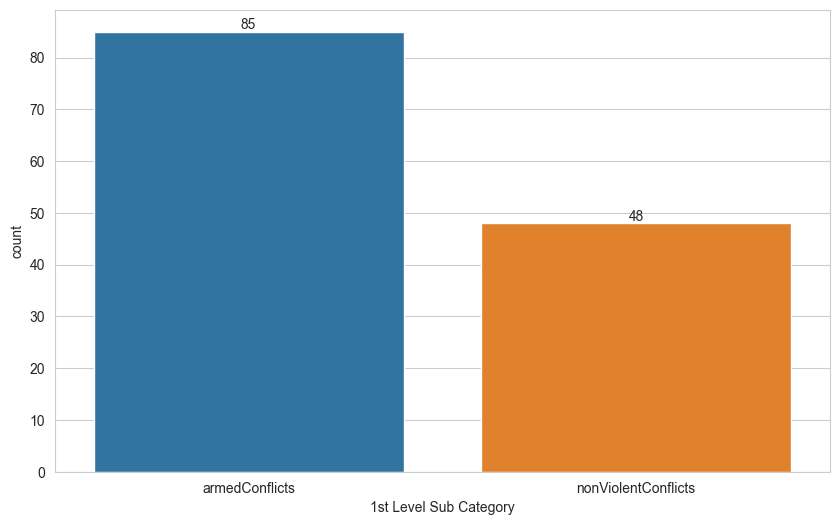

In [31]:
ax = sns.countplot(data = df2, x ="1st Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)

In [32]:
df2["2nd Level Sub Category"].value_counts()

explosionsRemoteViolence    42
battles                     37
militaryPreparations        30
economicConflict            12
violenceAgainstCivilians     6
retention                    6
Name: 2nd Level Sub Category, dtype: int64

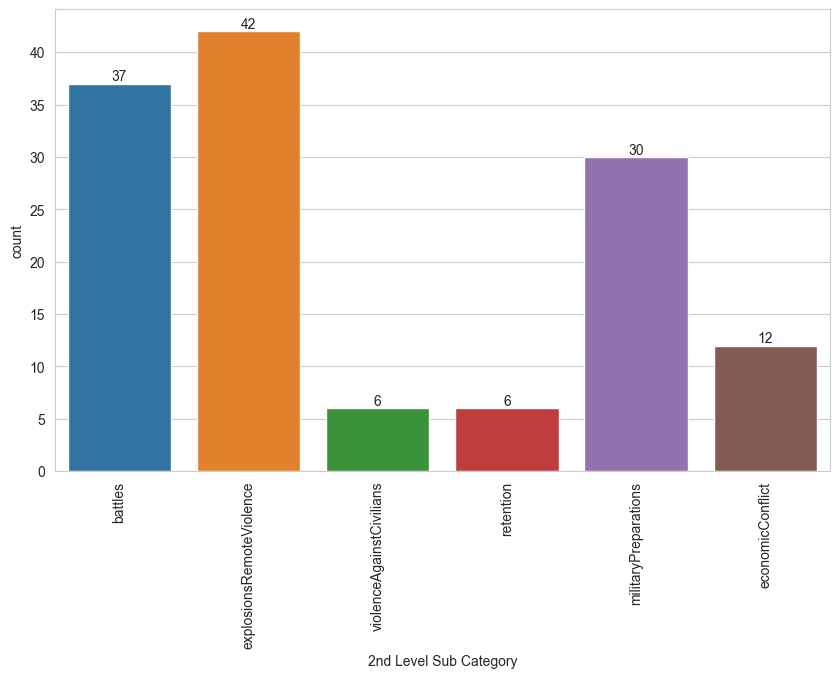

In [33]:
ax = sns.countplot(data = df2, x ="2nd Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [34]:
df2["3rd Level Sub Category"].value_counts()

Sanctions / Sanction Threats          7
Force deployment and redisposition    5
Territory overtake/regain             3
Economic governance conflict          3
Arms transfer                         3
Release                               3
armed clash                           3
Attack to Civilians                   3
Missile/Rocket/Artillery attack       3
Air/drone attack / air defence        3
Arrest                                2
Remote explosive/landmine             2
Air defence                           2
Military training                     2
Release of abductee                   2
Abduction/forced disappearance        1
Arrest                                1
Name: 3rd Level Sub Category, dtype: int64

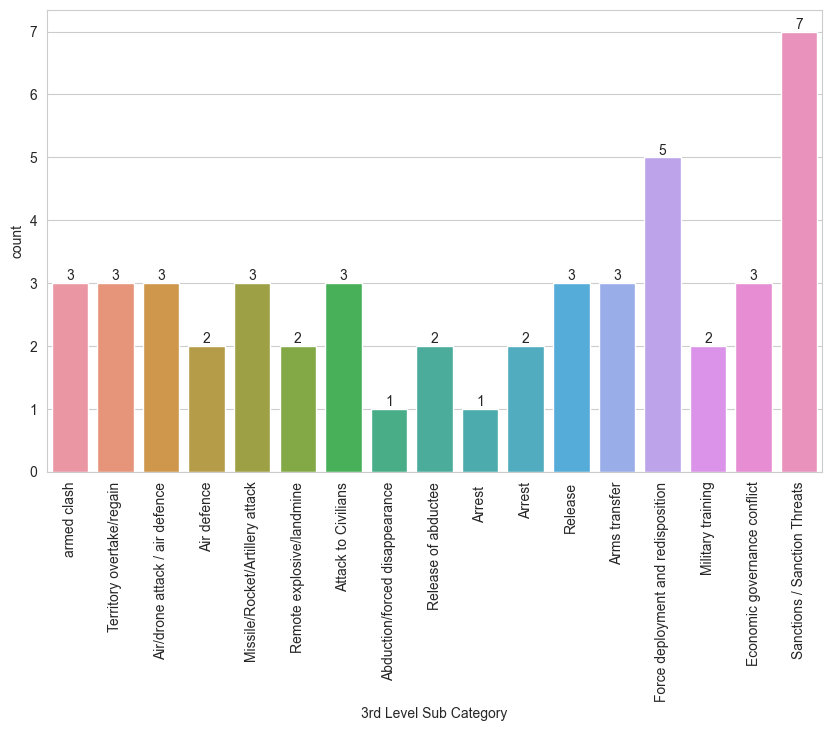

In [35]:
ax = sns.countplot(data = df2, x ="3rd Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [36]:
df2.groupby("2nd Level Sub Category")["3rd Level Sub Category"].value_counts(dropna=False)

2nd Level Sub Category    3rd Level Sub Category            
battles                   NaN                                   31
                          Territory overtake/regain              3
                          armed clash                            3
economicConflict          Sanctions / Sanction Threats           7
                          Economic governance conflict           3
                          NaN                                    2
explosionsRemoteViolence  NaN                                   32
                          Air/drone attack / air defence         3
                          Missile/Rocket/Artillery attack        3
                          Air defence                            2
                          Remote explosive/landmine              2
militaryPreparations      NaN                                   20
                          Force deployment and redisposition     5
                          Arms transfer                          3
 

# Data Cleaning

In [37]:
df2.isnull().sum()

Headline                   0
Abstract                   0
First Part                 5
Body                      34
Event Category             0
1st Level Sub Category     0
2nd Level Sub Category     0
3rd Level Sub Category    85
dtype: int64

In [38]:
df2.fillna('', inplace=True)

In [39]:
df2["Input"]=df2["Headline"].map(str) + df2["Abstract"].map(str) + df2["First Part"].map(str) + df2["Body"].map(str)

In [40]:
df2.Input.isnull().sum()

0

In [41]:
df2.isnull().sum()

Headline                  0
Abstract                  0
First Part                0
Body                      0
Event Category            0
1st Level Sub Category    0
2nd Level Sub Category    0
3rd Level Sub Category    0
Input                     0
dtype: int64

In [42]:
stop_words = stopwords.words('english')
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [43]:
df2["Input"]=df2["Input"].apply(cleaning)

In [44]:
worldcloud = WordCloud(background_color="white", max_words =200)

In [45]:
all_words = " ".join(df2.Input)

In [46]:
all_words[:100]

'libya unity force battle retake strategic sirte france loyal libya government sunday kept force stro'

In [47]:
worldcloud.generate(all_words)

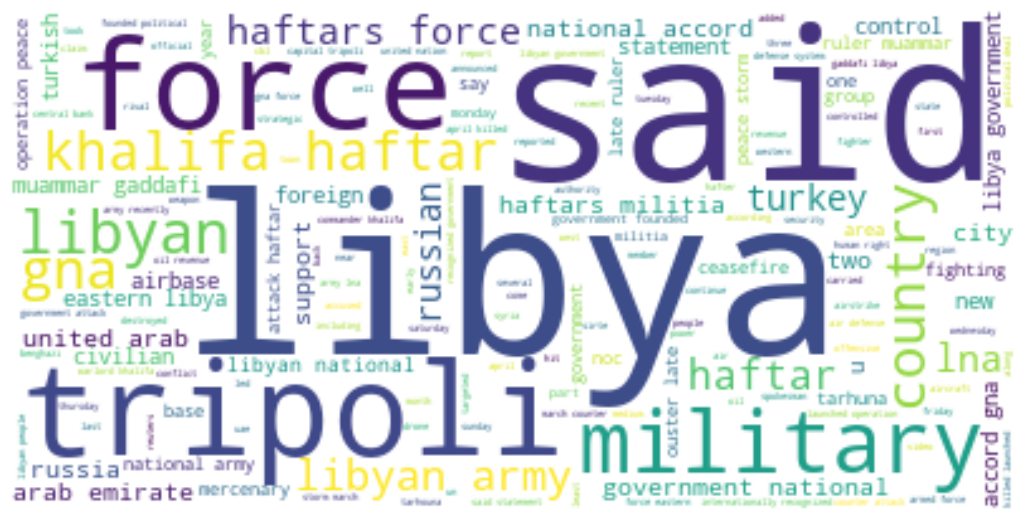

In [48]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Importing Libraries for Text Classification Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_score

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
import neattext.functions as nfx

In [51]:
df2.isnull().sum()

Headline                  0
Abstract                  0
First Part                0
Body                      0
Event Category            0
1st Level Sub Category    0
2nd Level Sub Category    0
3rd Level Sub Category    0
Input                     0
dtype: int64

In [52]:
df2[df2["3rd Level Sub Category"]=="Arrest "]

,Headline,Abstract,First Part,Body,Event Category,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category,Input
53,Embarrassed Tripoli Interior Ministry condemns...,The Ministry of Interior of the internationall...,It said the arrest does not represent the Trip...,Tripoli has been keen to create a positive atm...,conflicts,nonViolentConflicts,retention,Arrest,embarrassed tripoli interior ministry condemns...


In [53]:
df2.loc[df2["3rd Level Sub Category"]=="Arrest "]["3rd Level Sub Category"].replace("Arrest ","Arrest")

53    Arrest
Name: 3rd Level Sub Category, dtype: object

In [54]:
df2[df2["3rd Level Sub Category"]=="Arrest "]

,Headline,Abstract,First Part,Body,Event Category,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category,Input
53,Embarrassed Tripoli Interior Ministry condemns...,The Ministry of Interior of the internationall...,It said the arrest does not represent the Trip...,Tripoli has been keen to create a positive atm...,conflicts,nonViolentConflicts,retention,Arrest,embarrassed tripoli interior ministry condemns...


# Train Test Split

In [55]:
Xfeatures = df2["Input"]
ylabels = df2[["1st Level Sub Category", "2nd Level Sub Category","3rd Level Sub Category"]]

In [56]:
X_train,X_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.30, random_state=42)

In [57]:
X_train.head()

129    u say russia sent warplane back libyan warlord...
98     libyan army inflicts severe loss haftar militi...
53     embarrassed tripoli interior ministry condemns...
83     imposes sanction individual companywashington ...
103    force allied libyan government retake key airb...
Name: Input, dtype: object

In [58]:
X_test.head()

87     eastern libyan force say ready determined achi...
105    eastern libyan force say move back tripoli fro...
64     libyan army track flight carrying mercenary le...
78     u blacklist libya militia tied murder torture ...
153    libyan army conduct air ops airbasetwo grad ro...
Name: Input, dtype: object

In [59]:
y_train.head()

,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category
129,nonViolentConflicts,militaryPreparations,
98,armedConflicts,battles,
53,nonViolentConflicts,retention,Arrest
83,nonViolentConflicts,economicConflict,Sanctions / Sanction Threats
103,armedConflicts,battles,


In [60]:
y_test.head()

,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category
87,armedConflicts,battles,
105,armedConflicts,battles,
64,nonViolentConflicts,militaryPreparations,Force deployment and redisposition
78,nonViolentConflicts,economicConflict,Sanctions / Sanction Threats
153,armedConflicts,explosionsRemoteViolence,


# Multiclass Multioutput Models

## Multioutput Classifier Logistic Regression

In [61]:
pipe_lr = Pipeline(steps=[("cv",CountVectorizer()), ("lr_multi", MultiOutputClassifier(LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')))])

In [62]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.02,
                                                                    class_weight='balanced',
                                                                    max_iter=1000)))])

In [63]:
pipe_lr.score(X_test,y_test) #mean accuracy on the given test data and labels

0.4

### Prediction

In [64]:
ex1 = X_test.iloc[6]
ex1

'libyan army destroys missile system used pantsir air defense system supplied uae warlord city terhune libyan army wednesday destroyed air defense system used force loyal warlord khalifa haftar city spokesman volcano rage operation told anadolu agency pantsir missile system supplied haftars militia united arab emirate unmanned aerial vehicle libyan army targeting hangar also shared social medium local libyan army announced capturing strategic airbase western part country haftars militia captured air defense system type uae provided leader illegal armed force eastern libya intensified attack civilian since beginning may libyan army recently gained advantage inflicted severe loss government attack haftars force since april killed launched operation peace storm march counter attack ouster late ruler muammar gaddafi libya government founded political deal'

In [65]:
pipe_lr.predict([ex1])

array([['armedConflicts', 'explosionsRemoteViolence', '']], dtype=object)

In [66]:
X_test.iloc[6]
print(y_test.iloc[6])

1st Level Sub Category              armedConflicts
2nd Level Sub Category    explosionsRemoteViolence
3rd Level Sub Category                            
Name: 163, dtype: object


In [67]:
pipe_lr.predict_proba([ex1])

[array([[0.89890581, 0.10109419]]),
 array([[0.19609637, 0.02389667, 0.67549756, 0.07560543, 0.01049269,
         0.01841127]]),
 array([[0.33759122, 0.01545617, 0.08300201, 0.16781016, 0.00838479,
         0.01380707, 0.00948222, 0.00432365, 0.04424993, 0.02808608,
         0.10379943, 0.01235764, 0.03088592, 0.01357952, 0.04361236,
         0.01768194, 0.0658899 ]])]

## Multioutput Classifier KNN

In [68]:
pipe_knn = Pipeline(steps=[("cv",CountVectorizer()),("knn",KNeighborsClassifier(n_neighbors=5))])

In [69]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('knn', KNeighborsClassifier())])

### Prediction

In [70]:
pipe_knn.predict([ex1])

array([['armedConflicts', 'explosionsRemoteViolence', '']], dtype=object)

In [71]:
pipe_knn.predict_proba([ex1])

[array([[1., 0.]]),
 array([[0.4, 0. , 0.6, 0. , 0. , 0. ]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])]

## Multioutput Classifier Decision Tree

In [72]:
pipe_dt = Pipeline(steps=[("cv",CountVectorizer()),("dt",DecisionTreeClassifier(class_weight="balanced"))])

In [73]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('dt', DecisionTreeClassifier(class_weight='balanced'))])

In [74]:
pipe_dt.predict([ex1])

array([['armedConflicts', 'battles', '']], dtype=object)

In [75]:
pipe_dt.predict_proba([ex1])

[array([[1., 0.]]),
 array([[1., 0., 0., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])]

----
---